# Project Documentation For Sidescan Sonar Interpretation

## Introduction
For this project, I have produced 2 programs which are to be ultimately formed into a single program but for demonstration purposes, I have seperated them out so the point cloud filters can be modified seperately without waiting for the second program to churn them into wireframes

### XTF File description
XTF files are the files generated by a sonar system. They are one of many different types available although the submersible the Aberystwyth department has available is called a Sparus II AUV AFANC.
These files are in a binary format so can't be read by a typical programs available for Windows. A program I used to get an initial understanding of what I'm working with was called "Deepview". It's a free piece of software available online that can open sonar files (of a number of types aside from XTF) and allows the user to view the data in a 2D format. Available at: https://deepvision.se/

These XTF files are formed in a certain pattern that makes them easy to read once decoded. The file contains 2 main sections: the header and the ping packets. 
The header contains a number of useful information that is preconfigured when the rover is setup. An example can be seen below:

In [10]:
import pyxtf
file = r'D:\XTF Files\2019-12-17-10-58-10.xtf'
fileHeader = pyxtf.xtf_read(file)[0]
print(fileHeader)

FileFormat: 123
SystemType: 1
RecordingProgramName: b'IQUA'
RecordingProgramVersion: b'100'
SonarName: b'Imagenex_sidesca'
SonarType: 16
NoteString: b'Imagenex Technology Corp.'
ThisFileName: b'/home/user/logs/imagenex_sidescan/2019-12-17-10-58-10.xtf'
NavUnits: 3
NumberOfSonarChannels: 2
NumberOfBathymetryChannels: 0
NumberOfSnippetChannels: 0
NumberOfForwardLookArrays: 0
NumberOfEchoStrengthChannels: 0
NumberOfInterferometryChannels: 0
Reserved1: 0
Reserved2: 0
ReferencePointHeight: 0.0
ProjectionType: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
SpheriodType: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
NavigationLatency: 0
OriginY: 0.0
OriginX: 0.0
NavOffsetY: 0.0
NavOffsetX: 0.0
NavOffsetZ: 0.0
NavOffsetYaw: 0.0
MRUOffsetY: 0.0
MRUOffsetX: 0.0
MRUOffsetZ: 0.0
MRUOffsetYaw: 0.0
MRUOffsetPitch: 0.0
MRUOffsetRoll: 0.0
ChanInfo: [<pyxtf.xtf_ctypes.XTFChanInfo object at 0x000001C94EE0AE40>, <pyxtf.xtf_ctypes.XTFChanInfo object at 0x000001C94EE0ADC0>, <pyxtf.xtf_ctypes.XTFChanInfo object at 0x000001C94EE0AF4

As can be seen, there is a large amount of information within this header that may be of use although a lot of the information has not been configured (for unknown reasons). The most useful of this information is the amount of channels the sonar has available. This helps figure out what to expect from the ping packets as they are a 2D array of channels followed by roughly 1000 values of proximity data.

The ping packets are very much the same as the header. Each packet containing a variety of information before the proximity data. See example below

In [14]:
import pyxtf
file = r'D:\XTF Files\2019-12-17-10-58-10.xtf'
#Load file, select ping section, load as sonar header type, get first ping
pingPackets = pyxtf.xtf_read(file)[1][pyxtf.XTFHeaderType.sonar][0]
print(pingPackets)

MagicNumber: 64206
HeaderType: 0
SubChannelNumber: 0
NumChansToFollow: 2
Reserved1: [0, 0]
NumBytesThisRecord: 2384
Year: 2019
Month: 12
Day: 17
Hour: 10
Minute: 58
Second: 10
HSeconds: 70
JulianDay: 350
EventNumber: 0
PingNumber: 1
SoundVelocity: 750.0
OceanTide: 0.0
Reserved2: 0
ConductivityFreq: 0.0
TemperatureFreq: 0.0
PressureFreq: 0.0
PressureTemp: 0.0
Conductivity: 0.0
WaterTemperature: 0.0
Pressure: 0.0
ComputedSoundVelocity: 0.0
MagX: 0.0
MagY: 0.0
MagZ: 0.0
AuxVal1: 0.0
AuxVal2: 0.0
AuxVal3: 0.0
AuxVal4: 0.0
AuxVal5: 0.0
AuxVal6: 0.0
SpeedLog: 0.0
Turbidity: 0.0
ShipSpeed: 0.42637014389038086
ShipGyro: -2.7461719512939453
ShipYcoordinate: 41.777311577554464
ShipXcoordinate: 3.0338293840701036
ShipAltitude: 66
ShipDepth: 52
FixTimeHour: 0
FixTimeMinute: 0
FixTimeSecond: 0
FixTimeHsecond: 0
SensorSpeed: 0.0
KP: 0.0
SensorYcoordinate: 41.77731710999056
SensorXcoordinate: 3.0338290003047934
SonarStatus: 0
RangeToFish: 0
BearingToFish: 0
CableOut: 0
Layback: 0.0
CableTension: 0.0


Obviously the main information we want is the data which is under the header 'data' in the packet. As can be read from the file, the packet was taken on 17th December 2019 at 10:58:10 and that this packet is the first ping of the series.  Additional information is included which, while may not be immediately useful, may come in useful later. 

## Task 1 - Extracting the data from the XTF file
As mentioned previously, the initial task is extracting the data from the file is easy as it can be queried from the above. The resulting data is put into an XYZ file which is a point cloud format in which data is displayed line by line with each point having the format: X Y Z/n

Using this, we can expect the data to be collected radially from the closest point being streight down to the farthest point away from the rover. As seen from the example above, each array of values is preceeded by a series of low/ negligible values. These are values from the water column that occurs directly below the aquatic rover and is an overlap between the two sonar modules which allows us to match the right sonar to the left. 

<strong>Fig.1: Image showing a water column</strong>
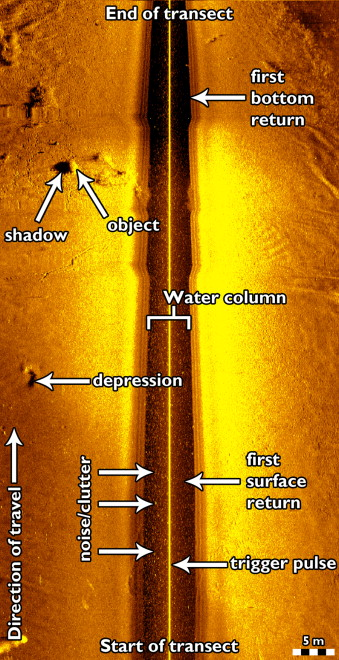

<strong>Fig.2: Image showing how the column maps to an overlap</strong> 
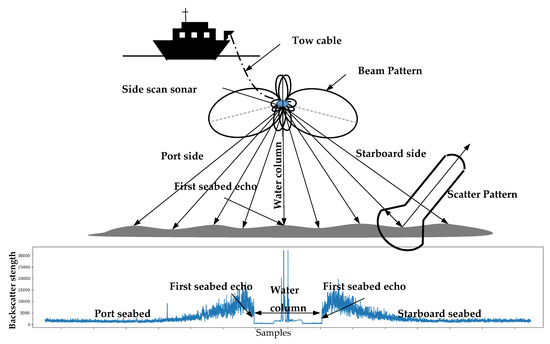

### Language and Libraries Used
<strong>Python 3</strong>
 - Version 3.8.7
 - Language used to create programs to interface and modify the files
 
<strong>pyxtf</strong>
 - Version 1.2
 - Library used to decode and read XTF files
 
<strong>Pycharm</strong>
 - Advanced IDE developed by JetBrains
 - More complex and additional features in comparison to the integrated Python IDE

### Manipulating the Data
As mentioned previously, the data needs to be translated into a point cloud format. Each ping is taken at a definitive time so we can treat each ping as a 2 dimentional piece of data. While in practice, this is incorrect as the sonar module is moving so all pings are recieved at a time lapse after the initial ping causing a distortion on the values, the values provided do not have enough resolution for this to matter as it would be in the factor of milliseconds.

In addition to this, each ping is recieved at a set delta so the time between samples is constant so we can treat each sample as a set distance. This will form the X-Axis as a displacement from the sensor.

Following on from the above, we can treat each ping value as a displacement from the seabed, with the seabed being a baseline value of 0 as there is no value recorded falling below 0. Using the displacement as the Y axis we can form a graph showing the profile of the seabed at any given ping. See below as an example:

<IPython.core.display.Javascript object>


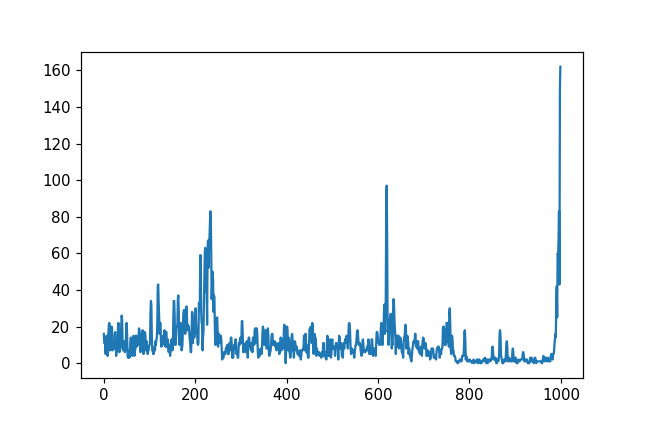

<IPython.core.display.Javascript object>


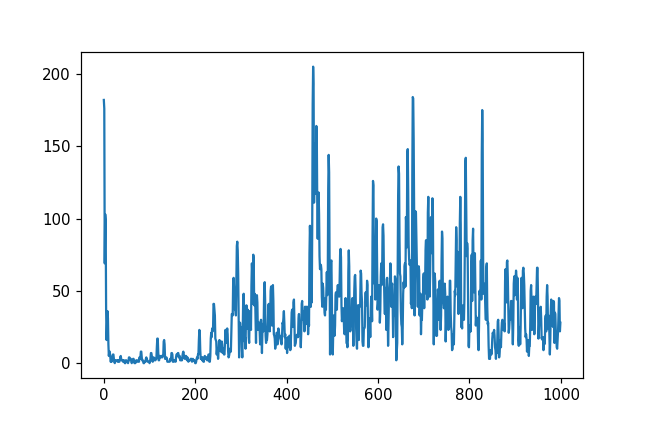

In [31]:
%matplotlib notebook
import pyxtf
from matplotlib import pyplot as plt

file = r'D:\XTF Files\2019-12-17-10-58-10.xtf'
#Load file, select ping section, load as sonar header type, get first ping
pingPackets = pyxtf.xtf_read(file)[1][pyxtf.XTFHeaderType.sonar][0]

x = range(0, len(pingPackets.data[0]))
y = pingPackets.data[0]

plt.figure(1)
plt.plot(x,y)

x2 = range(0, len(pingPackets.data[1]))
y2 = pingPackets.data[1]

plt.figure(2)
plt.plot(x2,y2)

As can be seen above, the top graph shows a significant boundary occuring at the value 800 while the bottom graph shows a boundary occuring at roughly 200. This is accurate as this is the water column occuring within the data which occurs at a mirrored value between the two data sets.
As can also be seen, the datasets are reversed with the first channel being post and the second being starboard in reference to the vessel (port being left and starboard being right in the frame of direction of the vessel).

What can also be observed is the amount of noise that occurs within the ping. This is an issue later on that needs to be dealt with but for now, we can plot each point as an XYZ coordinate using X as displacement from the vessel, Y as the displacement from the sea floor and Z as the displacement from the starting position. 

Using these as the 3 axis, we can generate an XYZ file using code similar to that below. For the sake of size as each ping packet is roughly 1000 values, I'm only going to format a segment of the first ping.

In [29]:
import pyxtf

file = r'D:\XTF Files\2019-12-17-10-58-10.xtf'
#Load file, select ping section, load as sonar header type, get first ping
pingSegments = pyxtf.xtf_read(file)[1][pyxtf.XTFHeaderType.sonar]


pingPackets = pingSegments[0].data
##As mentioned above, formatting the whole file would be massive on this page. This loop performs only on
##a segment of first ping packet
for packet in range(0, 1):
    for ping in range(0,50):
        print(ping, end="")
        print(" ", end="")
        print(str(pingPackets[packet][ping]), end="")
        print(" ", end="")
        print(packet, end="\n")


0 16 0
1 11 0
2 11 0
3 10 0
4 5 0
5 12 0
6 15 0
7 13 0
8 4 0
9 12 0
10 17 0
11 21 0
12 22 0
13 20 0
14 7 0
15 13 0
16 17 0
17 20 0
18 19 0
19 7 0
20 8 0
21 8 0
22 9 0
23 8 0
24 16 0
25 17 0
26 12 0
27 4 0
28 7 0
29 7 0
30 8 0
31 20 0
32 22 0
33 17 0
34 6 0
35 9 0
36 8 0
37 11 0
38 20 0
39 26 0
40 24 0
41 12 0
42 7 0
43 11 0
44 12 0
45 11 0
46 6 0
47 7 0
48 9 0
49 21 0


### Completion of Task 1
As can be seen above, we have translated the data into an XYZ format. While the above code is designed to be printed as an example so the reader can understand the data format, it can easily be adapted to write this to a file.
In addition, the code snippet is only intended to run on a segment of the data as each ping entry is 1000 entries and the whole file contains about 2500 ping packets. In the final version, the two for loops have to be adapted to operate on every ping packets and every dataset within each of those pings.

## Task 2 - Point Cloud to Wiremesh
As gained from the above, we have created a file with about 50,000,000 points that describe the seabed as seen by the sonar. As also seen by the 2D plot created in section above, there is a lot of noise in the data. This will cause issues later but for now, if we can understand the way to plot the data then we can focus on the denoising as the next task.

Through experimentation, the way that these points are stored is a 2D array with the first dimention being the points and the second being the XYZ coordinates of said points. The Python library Numpy, is able to read this information in a format and another library called open3d is able to convert the Numpy format into a manipulatable point cloud within Python. 

While open3d does feature an method to present data on a Jupyter notebook, I'm going to try avoid using this aside from demonstrations as the processing time for unfiltered data is substantial. Later on, I'll talk about processing the filtered data and may have a number of demonstrative charts included.

### Meshing Algorithms
Moving on, the open3d library has 2 meshing algorithms built in: ball piviot and poisson meshing. 

#### Ball piviot meshing
<strong>talk about meshing algorithm</strong>

#### Poisson meshing
<strong>talk about meshing algorithm</strong>

### Completion of Task 2
With regard to whats been acomplished at this stage, there isn't much demonstration as other sections. As mentioned previously, meshing the dataset at this scale takes too long with initial attempts to implement both algorithms being terminated at 16 hours since they were both unfinished. Going back to previous points, the dataset is too large to be processed at this stage. This leads cleanly to simplification of the dataset and again, follow onto a second section covering the meshing of the point cloud once simplified.

## Task 3 - Simplifying the data
So as mentioned above, the data needs to be simplified before we can visualise it since the dataset is so large